<a href="https://colab.research.google.com/github/Akveni/FreeCodeCamp/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [ ]:
# read data as pandas data frame
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [ ]:
# quick look to data
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape # (569, 31)

(569, 31)

In [ ]:
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Histogram
#How many times each value appears in dataset. This description is called the distribution of variable
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
Frequency = number of times each value appears
Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

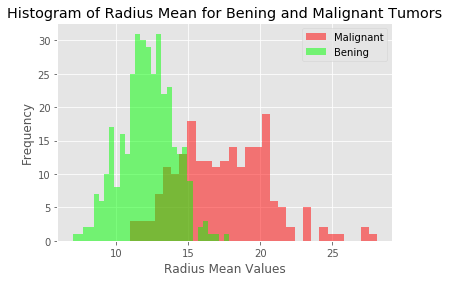

In [ ]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()


## Outliers
While looking histogram as yok can see there are rare values in bening distribution (green in graph)
There values can be errors or rare events.
These errors and rare events can be called outliers.
Calculating outliers:
first we need to calculate first quartile (Q1)(25%)
then find IQR(inter quartile range) = Q3-Q1
finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
Anything outside this range is an outlier
lets write the code for bening tumor distribution for feature radius mean

In [ ]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645 , 16.805 )
Outliers:  [  6.981  16.84   17.85 ]


## Box Plot
You can see outliers also from box plots
We found 3 outlier in bening radius mean and in box plot there are 3 outlier.

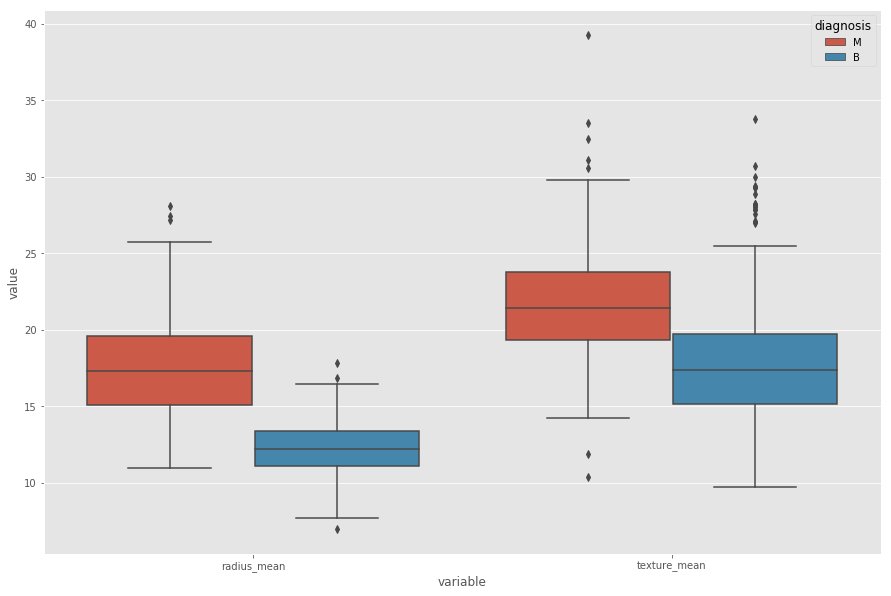

In [ ]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()


## Summary Statistics
Mean
Variance: spread of distribution
Standart deviation square root of variance
Lets look at summary statistics of bening tumor radiance mean

In [ ]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

NameError: name 'data_bening' is not defined

## CDF
Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
Lets explain in cdf graph of bening radiues mean
in graph, what is P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
You can plot cdf with two different method

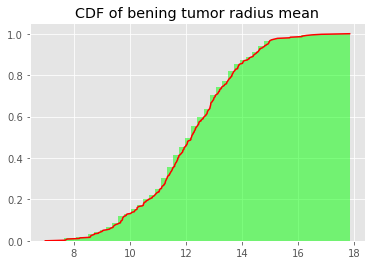

In [ ]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

## Relationship Between Variables
We can say that two variables are related with each other, if one of them gives information about others
For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
Scatter Plot
Simplest way to check relationship between two variables
Lets look at relationship between radius mean and area mean
In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

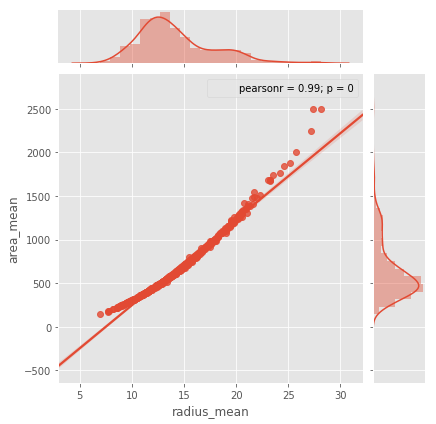

In [ ]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

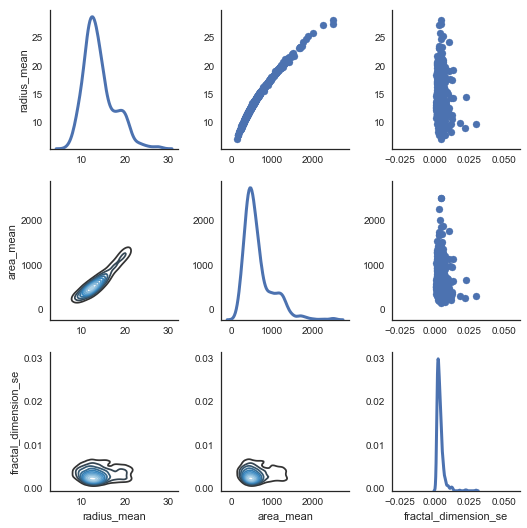

In [ ]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

## Correlation
Strength of the relationship between two variables
Lets look at correlation between all features.

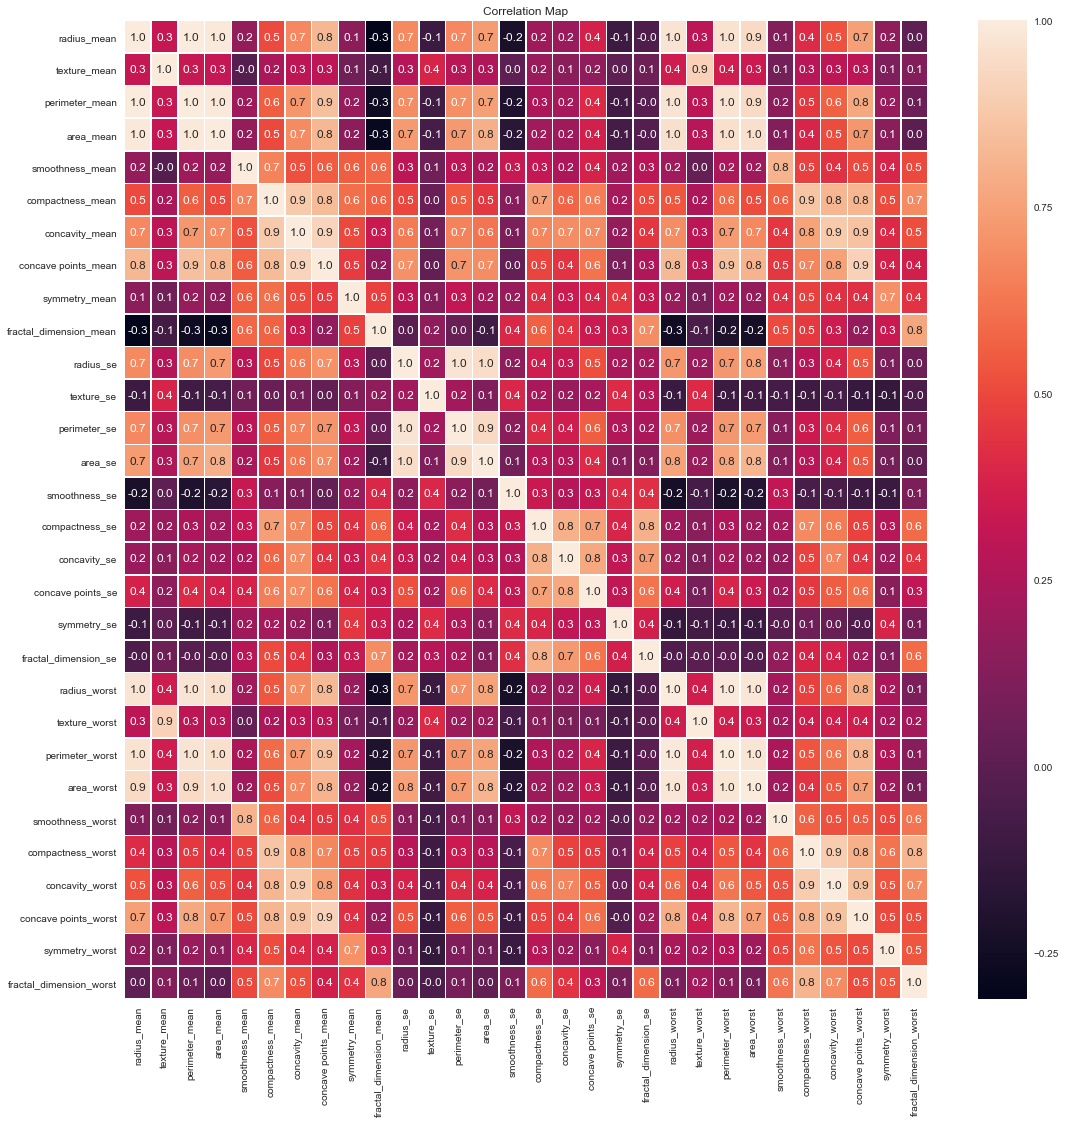

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

## Covariance
Covariance is measure of the tendency of two variables to vary together
So covariance is maximized if two vectors are identical
Covariance is zero if they are orthogonal.
Covariance is negative if they point in opposite direction
Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se

In [ ]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.48340935
Covariance between radius mean and fractal dimension se:  -0.000397624857644


## Pearson Correlation
Division of covariance by standart deviation of variables
Lets look at pearson correlation between radius mean and area mean
First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :)
p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))
As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
To be more clear what we did at correlation part and pearson correlation part is same.

In [ ]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.987357170057


In [ ]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.52534924926e-184


P values is almost zero so we can reject null hypothesis.

## Normal(Gaussian) Distribution and z-score
Also called bell shaped distribution
Instead of making formal definition of gaussian distribution, I want to explain it with an example.
The classic example is gaussian is IQ score.
In the world lets say average IQ is 110.
There are few people that are super intelligent and their IQs are higher than 110. It can be 140 or 150 but it is rare.
Also there are few people that have low intelligent and their IQ is lower than 110. It can be 40 or 50 but it is rare.
From these information we can say that mean of IQ is 110. And lets say standart deviation is 20.
Mean and standart deviation is parameters of normal distribution.
Lets create 100000 sample and visualize it with histogram.

mean:  109.906963721
standart deviation:  20.0109718406


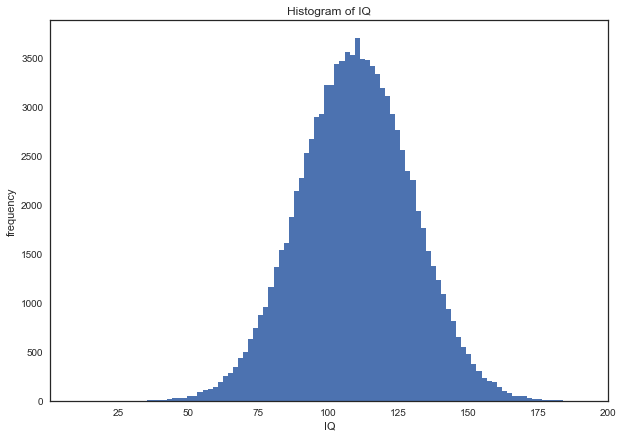

In [ ]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()